<a href="https://colab.research.google.com/github/pedrosena138/if1007-tasi4/blob/main/Analise_de_casos_de_febre_amarela_em_humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de casos de febre amarela em humanos nos estados brasileiros

## Bibliotecas

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}

plt.rcParams.update(params)
plt.style.use('seaborn')

## Descrição da Base

| Coluna            | Descrição                                                     |
|-------------------|---------------------------------------------------------------|
| ID                | Identificador sequencial único                                |
| MACRORREG_LPI     | Sigla da macrorregião do local provável de infecção           |
| COD_UF_LPI        | Código IBGE da Unidade Federada do local provável de infecção |
| UF_LPI            | Sigla da Unidade Federada do local provável de infecção       |
| COD_MUN_LPI       | Código IBGE do município do local provável de infecção        |
| MUN_LPI           | Nome do município do local provável de infecção               |
| SEXO              | Sexo do indivíduo                                             |
| IDADE             | Idade do indivíduo                                            |
| DT_IS             | Data de início dos sintomas do indivíduo (dd/mm/aaaa)         |
| SE_IS             | Semana epidemiológica de início dos sintomas do indivíduo     |
| MES_IS            | Mês de início dos sintomas do indivíduo                       |
| ANO_IS            | Ano de início dos sintomas do indivíduo                       |
| MONITORAMENTO_IS  | Período de monitoramento de início dos sintomas do indivíduo¹ |
| OBITO             | Evolução para o óbito                                         |
| DT_OBITO          | Data do óbito (dd/mm/aaaa)                                    |

¹ o **período de monitoramento** corresponde à estratificação temporal dos dados em períodos
anuais com início em julho e término em junho. Cada período de monitoramento corresponde
a um intervalo de 12 meses, que inclui o segundo semestre de um ano e o primeiro semestre do
ano seguinte. Essa representação do componente temporal decorre do reconhecimento de um
período sazonal de transmissão, entre dezembro e maio, que concentra a maior parte dos
eventos registrados no país, e tem como intuito evitar a análise fragmentada dos processos de
transmissão, cujo pico de ocorrência se dá geralmente na transição entre os anos. O Ministério
da Saúde adota essa estratificação para fins de políticas de vigilância em saúde e análise
epidemiológica

Fonte: https://opendatasus.saude.gov.br/dataset/febre-amarela-em-humanos-e-primatas-nao-humanos

In [76]:
df = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/fa_casoshumanos_1994-2021.csv', sep=';', encoding='latin-1')

In [77]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2758 non-null   int64  
 1   MACRORREG_LPI     2758 non-null   object 
 2   COD_UF_LPI        2758 non-null   int64  
 3   UF_LPI            2758 non-null   object 
 4   COD_MUN_LPI       2751 non-null   float64
 5   MUN_LPI           2752 non-null   object 
 6   SEXO              2757 non-null   object 
 7   IDADE             2756 non-null   object 
 8   DT_IS             2753 non-null   object 
 9   SE_IS             2742 non-null   float64
 10  MES_IS            2747 non-null   float64
 11  ANO_IS            2758 non-null   int64  
 12  MONITORAMENTO_IS  2758 non-null   object 
 13  OBITO             2758 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 301.8+ KB
None


,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,Alto Alegre,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,Pacaraima,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO
2,3,NE,21,MA,210060.0,Amarante do Maranhão,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,Amarante do Maranhão,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,Conceição do Araguaia,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM


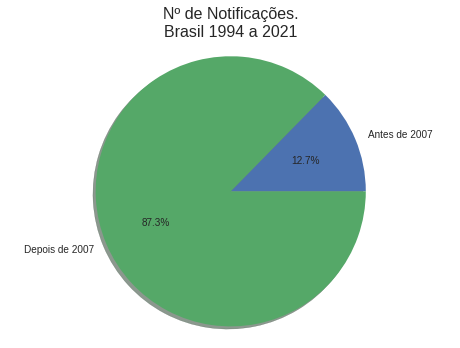

In [78]:
total = df.shape[0]
values = df.groupby(df['ANO_IS'] >= 2007).size().values
labels = ['Antes de 2007', 'Depois de 2007']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Nº de Notificações.\nBrasil 1994 a 2021', fontsize=16)
plt.show()

In [79]:
df = df[df['ANO_IS'] >= 2007]
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 349 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2409 non-null   int64  
 1   MACRORREG_LPI     2409 non-null   object 
 2   COD_UF_LPI        2409 non-null   int64  
 3   UF_LPI            2409 non-null   object 
 4   COD_MUN_LPI       2402 non-null   float64
 5   MUN_LPI           2403 non-null   object 
 6   SEXO              2408 non-null   object 
 7   IDADE             2408 non-null   object 
 8   DT_IS             2406 non-null   object 
 9   SE_IS             2406 non-null   float64
 10  MES_IS            2409 non-null   float64
 11  ANO_IS            2409 non-null   int64  
 12  MONITORAMENTO_IS  2409 non-null   object 
 13  OBITO             2409 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 282.3+ KB
None


,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
2753,2754,S,42,SC,420060.0,ÁGUAS MORNAS,M,34,19/03/2021,11.0,3.0,2021,2020/2021,SIM
2754,2755,S,42,SC,421780.0,TAIÓ,F,40,06/01/2021,1.0,1.0,2021,2020/2021,NÃO
2755,2756,N,15,PA,150030.0,AFUÁ,M,18,19/05/2021,20.0,5.0,2021,2020/2021,IGN
2756,2757,N,15,PA,150030.0,AFUÁ,M,21,07/07/2021,27.0,7.0,2021,2021/2022,SIM
2757,2758,N,15,PA,150520.0,OEIRAS DO PARÁ,M,26,09/12/2021,49.0,12.0,2021,2021/2022,SIM


## Tratamento de Dados

In [80]:
def converte_age_type(elm):
    try:
        e = elm.replace(',', '.')
        return e
    except AttributeError as e:
        pass
        

df['IDADE'] = df['IDADE'].apply(converte_age_type).astype('float32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Análise dos Dados

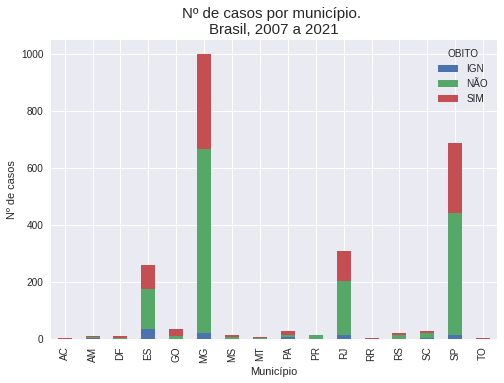

In [81]:
uf = df.groupby(['UF_LPI', 'OBITO']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Nº de casos por município. \nBrasil, 2007 a 2021', fontsize=15)
plt.ylabel('Nº de casos')
plt.xlabel('Município')
plt.show()

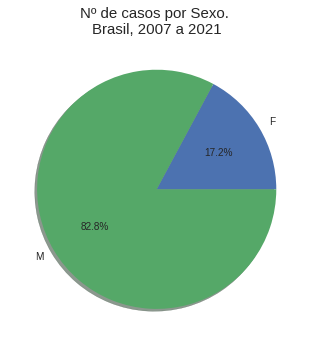

In [82]:
df.groupby('SEXO').size().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Nº de casos por Sexo. \nBrasil, 2007 a 2021', fontsize=15)
plt.ylabel('')
plt.show()

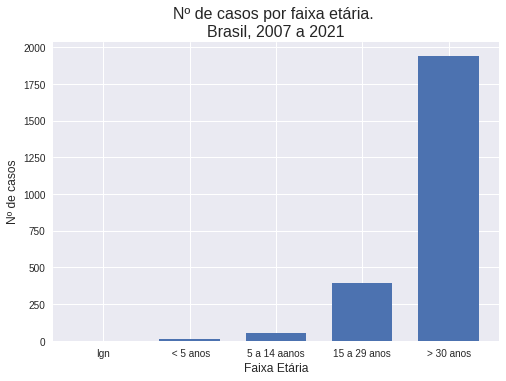

In [84]:
def get_age_groups():
    groups = {
        'age_null': len(np.where(df['IDADE'].isnull())),
        'age_5': df.query('IDADE < 5').shape[0],
        'age_5_to_14': df.query('IDADE >= 5 & IDADE <= 14').shape[0],
        'age_15_to_29': df.query('IDADE >= 15 & IDADE <= 29').shape[0],
        'age_30': df.query('IDADE >= 30').shape[0],
    }

    return groups

age_groups = get_age_groups()
values = age_groups.values()

r = np.arange(len(values))
X = ['Ign', ' < 5 anos', '5 a 14 aanos', '15 a 29 anos', '> 30 anos']

plt.bar(r, values,  width=0.7)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Nº de casos', fontsize=12)
plt.title("Nº de casos por faixa etária. \nBrasil, 2007 a 2021", fontsize=16)
plt.xticks(r, X)

plt.show()